In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = np.array([[0, 0], [1, 0], [0, 1],[1, 1]])

y = np.array([[1],[1],[0],[0]])

In [ ]:
m = len(X[0])
n = len(X[1])


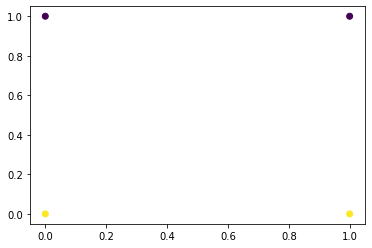

In [ ]:
plt.scatter(X[:,0],X[:,1],c=[y])

In [ ]:
theta = np.random.rand(X.shape[1],1)
bias = 1
theta


array([[0.9437975 ],
       [0.02949986]])

In [ ]:
hypothesis = X@theta + bias
hypothesis

array([[1.        ],
       [1.52869552],
       [1.53131764],
       [2.06001316]])

In [ ]:
z = 1/(1 + np.exp(-hypothesis))
z

array([[0.75655998],
       [0.850898  ],
       [0.77064997],
       [0.86053436]])

In [ ]:
cost0 = y.T@(np.log(z))
cost1 = (1-y).T@(np.log(1-z))
cost = -((cost1 + cost0))
cost

array([[3.80480576]])

In [ ]:
dW = (1/m)*np.dot(X .T, (z - y))
dB = (1/m)*np.sum((z - y)) 


In [ ]:
theta -= 0.1*dW
bias -= 0.1*dB

In [ ]:
c_check = list()
for i in range(100):
  lr = 0.08
  hypothesis = X@theta + bias
  z = 1/(1 + np.exp(-hypothesis))
  cost0 = y.T@(np.log(z))
  cost1 = (1-y).T@(np.log(1-z))
  cost = -((cost1 + cost0))
  c_check.append(cost[0])
  dW = (1/m)*np.dot(X .T, (z - y))
  dB = (1/m)*np.sum((z - y)) 
  theta -= lr*dW
  bias -= lr*dB

In [ ]:
c_check[len(c_check)-1]

array([0.10376257])

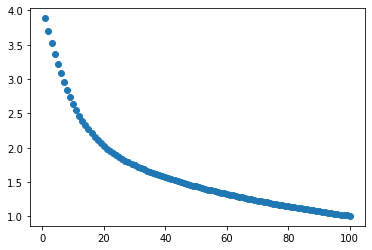

In [ ]:
plt.scatter(range(1,101),c_check)

In [ ]:
def pred(x):
  ans = [] 
  hypothesis = x@theta + bias
  z = 1/(1 + np.exp(-hypothesis)) 
  ans =  [1 if i > 0.5 else 0 for i in z]
  return ans

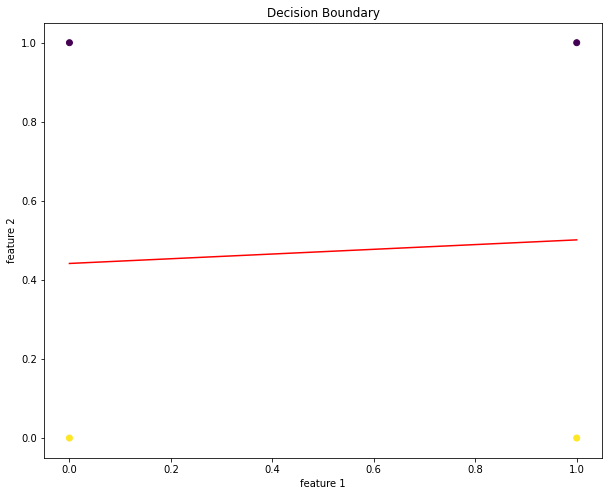

In [ ]:
x1 = [min(X[:,0]), max(X[:,0])]
m = -theta[0]/theta[1]
c = -bias/theta[1]
x2 = m*x1 + c
    
# Plotting
fig = plt.figure(figsize=(10,8))
#plt.scatter(X[:,0], X[:,1], c = y)
plt.scatter(X[:,0], X[:,1], c = pred(X))
# plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
# plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Decision Boundary')
plt.plot(x1, x2, 'r-')

In [ ]:
tp,tn,fp,fn = 0,0,0,0
for i in range(len(y)):
  if y[i] == 1 and pred(X[i]) == 1:
    tp += 1
  elif y[i] == 1 and pred(X[i]) == 0:
    fn += 1
  elif y[i] == 0 and pred(X[i]) == 1:
    fp += 1
  elif y[i] == 0 and pred(X[i]) == 0:
    tn += 1
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1_score = 2*precision*recall/(precision+recall)
print(precision,recall,f1_score)

1.0 1.0 1.0
